In [1]:
import os
import pathlib
import imageio
import numpy as np
from sklearn.cluster import KMeans

# %matplotlib inline
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [30]:
data_folder = '../data'
# Glob the training data and load a single image path
image_set = os.path.join(data_folder, 'image_sets/train1_ids_all_670')
image_locations = [x.strip('\n') for x in open(image_set, 'r').readlines() if x is not '\n']
image_keys = [x.split('/')[-1].strip('.png') for x in image_locations]
print('the total number of training image is: ', len(image_keys))

the total number of training image is:  670


In [59]:
def get_train_path(image_key):
    return os.path.join(data_folder, 'stage1_images/stage1_train', image_key + '.png')
def get_test_path(image_key):
    return os.path.join(data_folder, 'stage1_images/stage1_test', image_key + '.png')

In [60]:
def get_average_RGB(image_keys, mode):
    num_images = len(image_keys)
    RGB_intensities = np.zeros((num_images, 3))
    for i in range(num_images):
        if mode in ['train']:
            image_path = get_train_path(image_keys[i])
        elif mode in ['test']:
            image_path = get_test_path(image_keys[i])
        else:
            raise NotImplementedError
        im = imageio.imread(image_path)[:, :, :3]
        RGB_intensities[i, :] = im.reshape(-1, 3).mean(0)
    return RGB_intensities

<IPython.core.display.Javascript object>


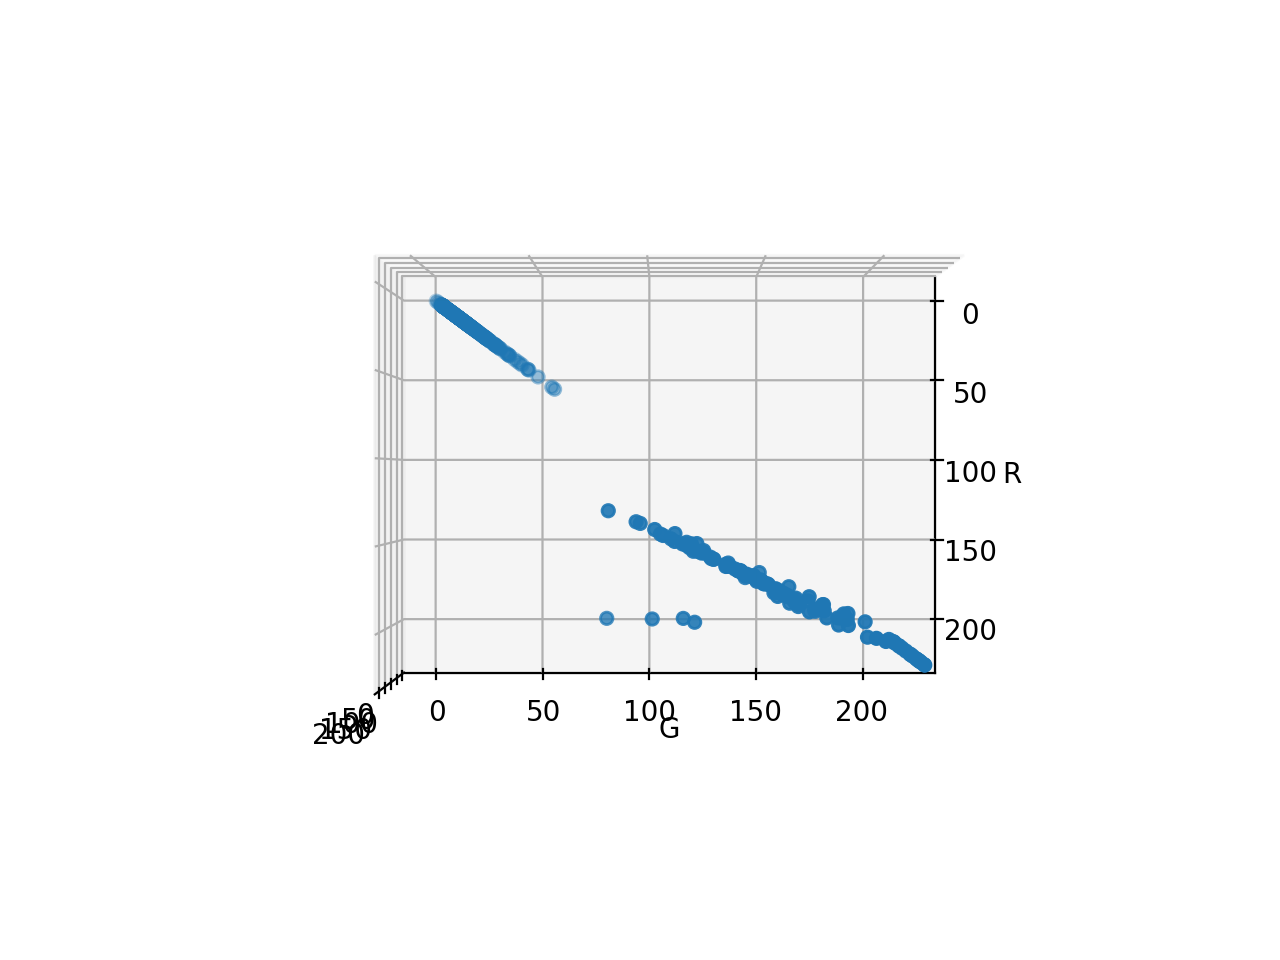

In [40]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(90, 0)
ax.scatter3D(img_intensity_R, img_intensity_G, img_intensity_B)
plt.xlabel('R')
plt.ylabel('G')

<IPython.core.display.Javascript object>


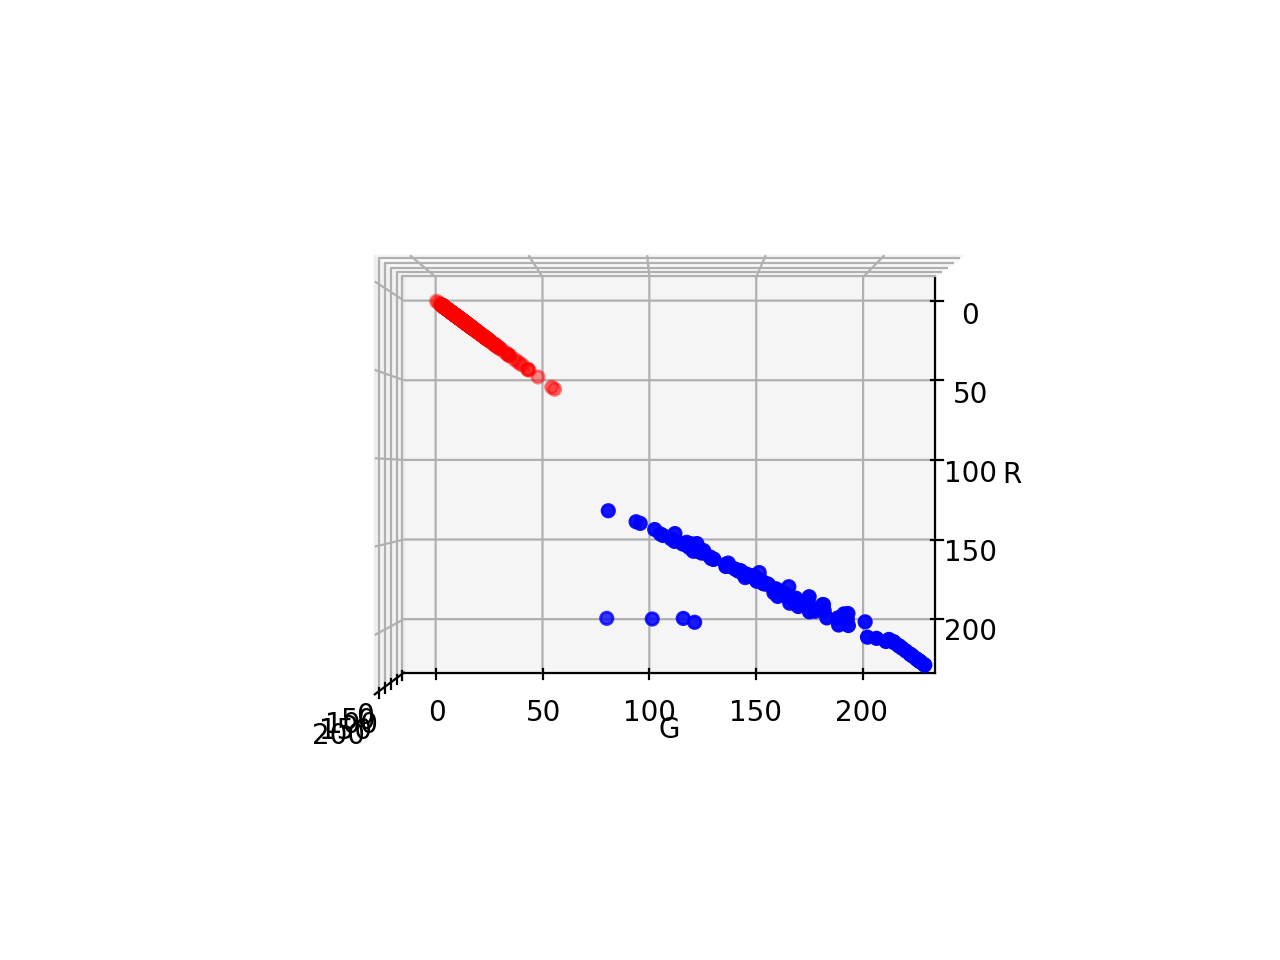

In [57]:
RGB_intensities = get_average_RGB(image_keys, 'train')
model = KMeans(n_clusters=2, max_iter=1000, tol=1e-6)
prediction = model.fit_predict(RGB_intensities)
colors = [['r', 'b'][i] for i in prediction]
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(90, 0)
ax.scatter3D(img_intensity_R, img_intensity_G, img_intensity_B, c=colors)
plt.xlabel('R')
plt.ylabel('G')

In [23]:
(np.array(colors) == 'b').sum()

124

In [69]:
data_folder = '../data'
# Glob the training data and load a single image path
image_test_set = os.path.join(data_folder, 'image_sets/test1_ids_all_65')
image_test_locations = [x.strip('\n') for x in open(image_test_set, 'r').readlines() if x is not '\n']
image_test_keys = [x.split('/')[-1].strip('.png') for x in image_test_locations]
print('the total number of training image is: ', len(image_test_keys))
RGB_test_intensities = get_average_RGB(image_test_keys, 'test')
model = KMeans(n_clusters=2, max_iter=1000, tol=1e-6)
prediction = model.fit_predict(RGB_test_intensities)
with open('class1', 'a') as c1, open('class2', 'a') as c2:
    for i in range(len(prediction)):
        if prediction[i] == 0:
            print(image_test_locations[i], file=c1)
        else:
            print(image_test_locations[i], file=c2)

the total number of training image is:  65


<IPython.core.display.Javascript object>


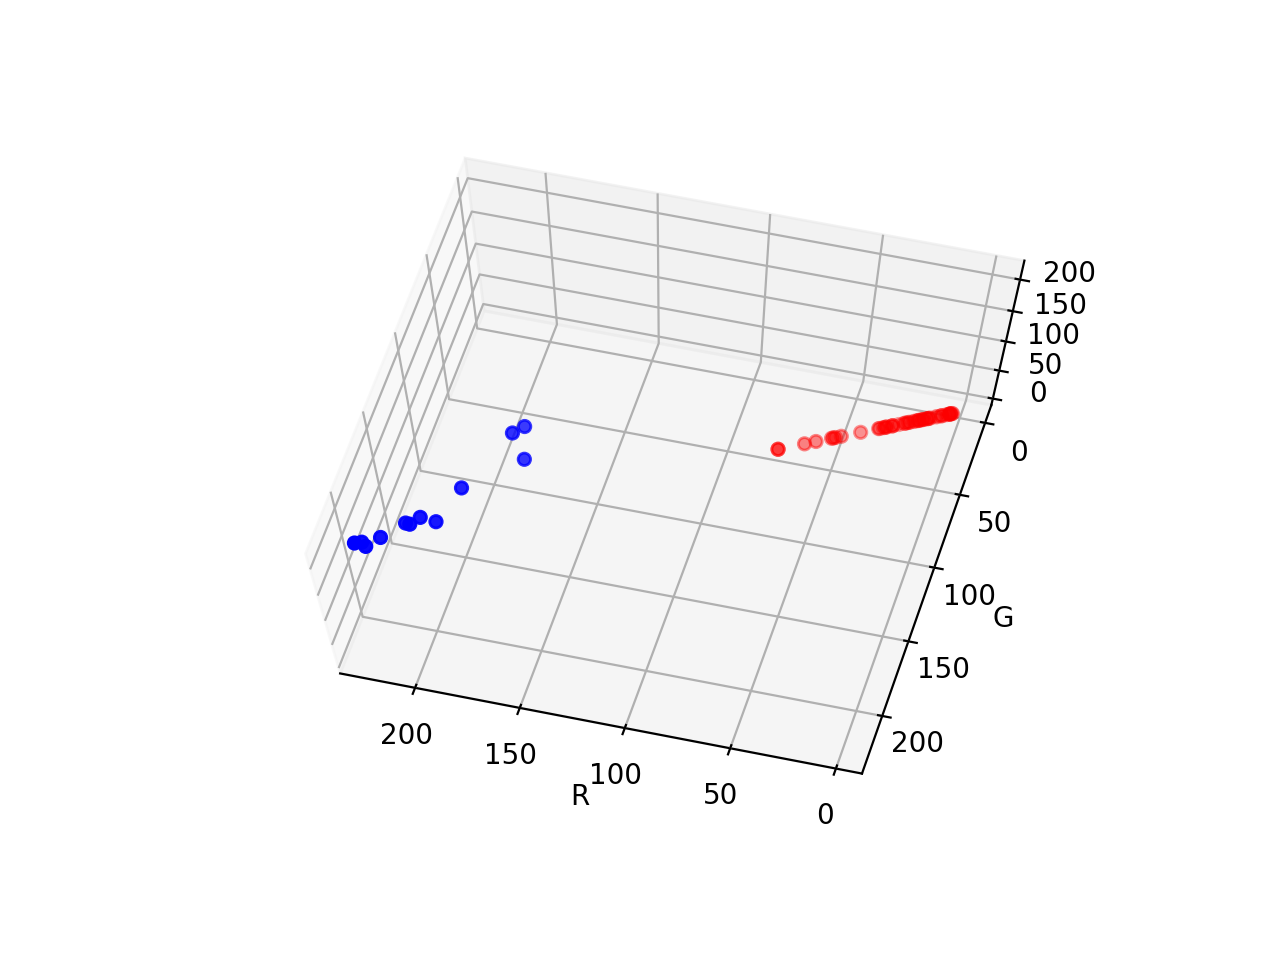

In [68]:
# here the model is DBSCAN trained in the training set.
colors = [['r', 'b'][i] for i in prediction]
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(90, 0)
ax.scatter3D(RGB_test_intensities[:, 0], RGB_test_intensities[:, 1], RGB_test_intensities[:, 2], c=colors)
plt.xlabel('R')
plt.ylabel('G')

In [75]:
def draw_image(description, image_key, mode):
    if mode in ['train']:
        image_path = get_train_path(image_key)
    else:
        image_path = get_test_path(image_key)
    im = imageio.imread(image_path)
    plt.figure()
    plt.imshow(im)
    plt.title(description)
    plt.show()

<IPython.core.display.Javascript object>


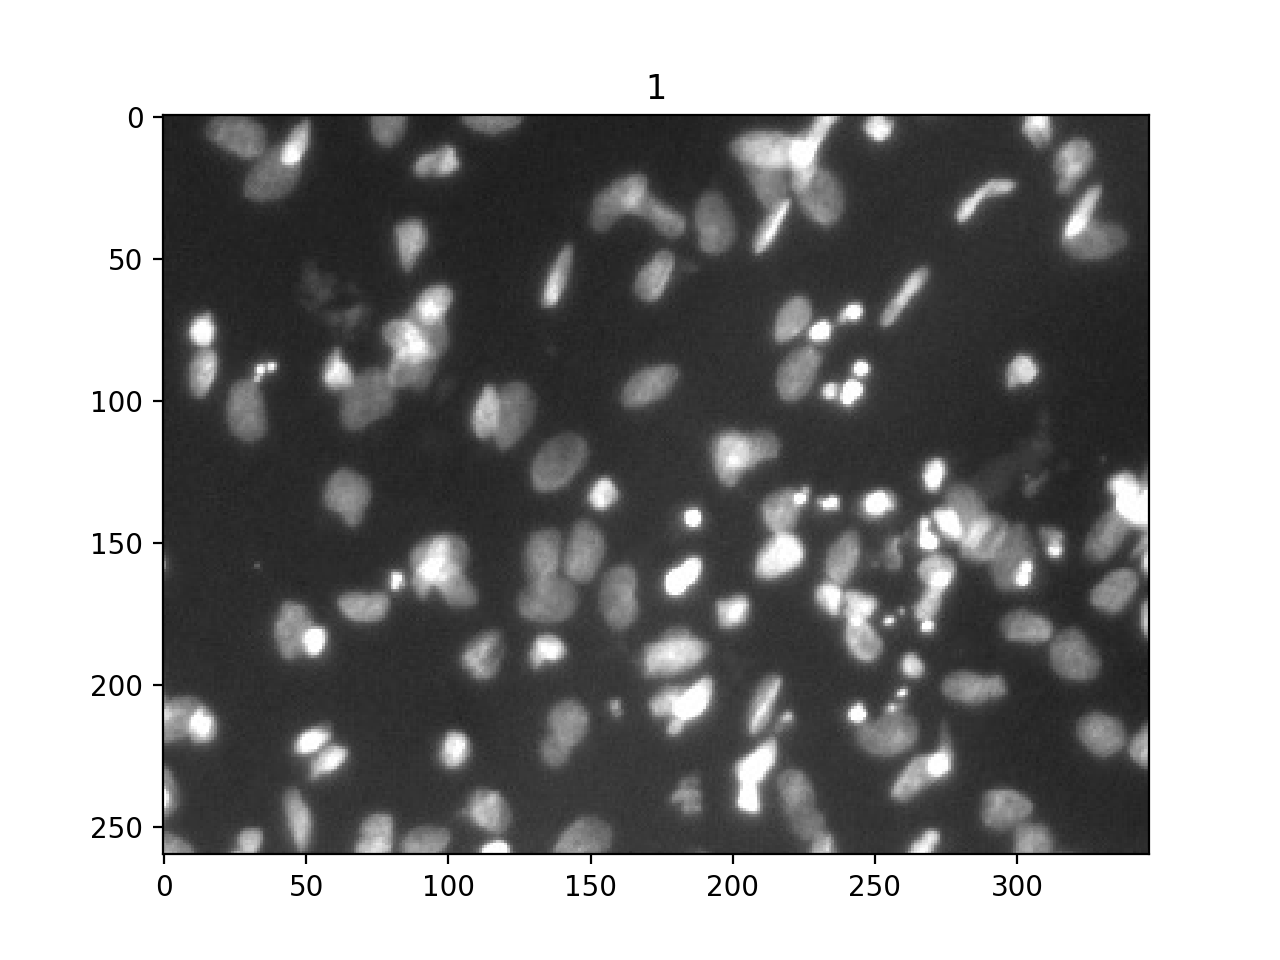

In [146]:
i = 30

draw_image(str(prediction[i]), image_test_keys[i], 'test')

## Make prediction using different models for different color classes

In [149]:
len(prediction) - sum(prediction)

12